# ECE 637 Deep Learning Lab Exercises


Name: *Your name*

# Section 1

## Exercise 1.1

1.   Create two lists, `A` and `B`: `A` contains 3 arbitrary numbers and `B` contains 3 arbitrary strings.
2.   Concatenate two lists into a bigger list and name that list `C`. 
3.   Print the first element in `C`.
4.   Print the second last element in `C` via negative indexing.
5.   Remove the second element of `A` from `C`.
6.   Print `C` again.

In [1]:
#  ----------- YOUR CODE -----------
A = [1,2,3]
B = ['a','b','c']
C = A + B
print(C[0])
print(C[-2])
C.remove(A[1])
print(C)

1
b
[1, 3, 'a', 'b', 'c']


## Exercise 1.2
In this exercise, you will use a low-pass IIR filter to remove noise from a sine-wave signal.

You should organize your plots in a 3x1 subplot format.

1. Generate a discrete-time signal, `x`, by sampling a 2Hz continuous time sine wave signal with peak amplitude 1 from time 0s to 10s and at a sampling frequency of 500 Hz. Display the signal, `x`, from time 4s to 6s in the first row of a 3x1 subplot with the title "original signal".

2. Add Gaussian white random noise with 0 mean and standard deviation  0.1 to `x` and call it `x_n` . Display `x_n` from 4s to 6s on the second row of the subplot with the title "input signal".

3. Design a low-pass butterworth IIR filter of order 5 with a cut-off frequency of 4Hz, designed to filter out the noise.  Hint: Use the [signal.butter](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.butter.html#scipy.signal.butter) function and note that the frequencies are relative to the Nyquist frequency. Apply the IIR filter to `x_n`, and name the output `y`. Hint: Use [signal.filtfilt](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt) function. Plot `y` from 4s to 6s on the third row of the subplot with the title "filtered signal".


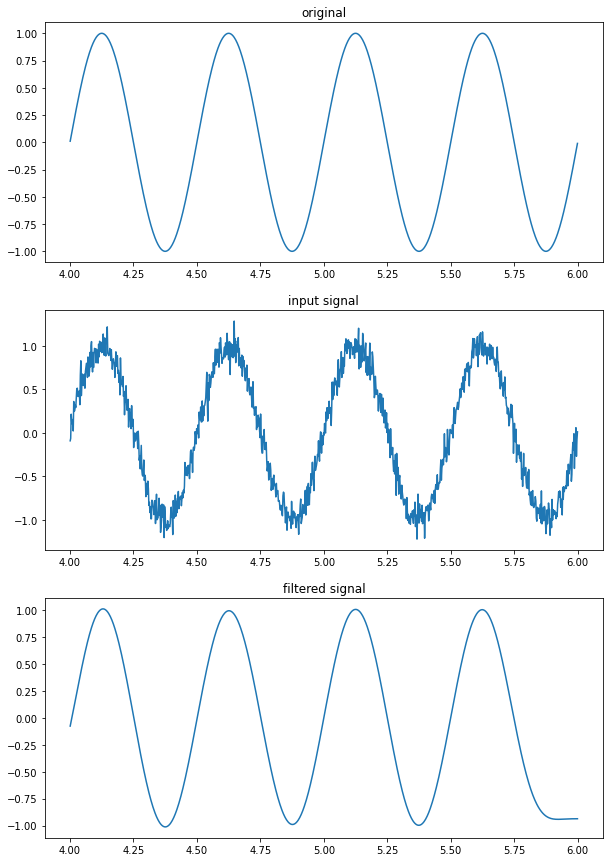

In [2]:
import numpy as np                     # import the numpy packages and use a shorter alising name
import matplotlib.pyplot as plt        # again import the matplotlib's pyplot packages
from scipy import signal               # import a minor package signal from scipy
plt.figure(figsize=(10, 15))           # fix the plot size

#  ----------- YOUR CODE -----------
f=2
fs=500
t = np.linspace(0,10,fs*10)
t = t[4*fs:6*fs]
x = np.sin(2*np.pi*f*t)
gn = np.random.normal(0,0.1,np.size(t))
x_n = x + gn
fc = 4
w = fc/(fs/2)
b,a = signal.butter(5,w)
y = signal.filtfilt(b,a,x_n)
plt.subplot(3,1,1)
plt.plot(t,x)
plt.title('original')
plt.subplot(3,1,2)
plt.plot(t,x_n)
plt.title('input signal')
plt.subplot(3,1,3)
plt.plot(t,y)
plt.title('filtered signal')
plt.show()

# Section 2

## Exercise 2.1

*   Plot the third image in the test data set
*   Find the correspoding label for the this image and make it the title of the figure


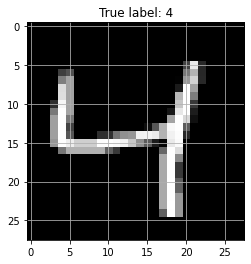

In [3]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#  ----------- YOUR CODE -----------
k = 2
image = train_images[k,:,:,0]   
label = train_labels[k]
plt.imshow(image, cmap='gray')  
ax = plt.gca()                  
ax.grid(b=None)                 
plt.title('True label: '+str(label))
plt.show()                      

## Exercise 2.2
It is usually helpful to have an accuracy plot as well as a loss value plot to get an intuitive sense of how effectively the model is being trained. 

* Add code to this example for plotting two graphs with the following requirements:
  - Use a 1x2 subplot with the left subplot showing the loss function and right subplot showing the accuracy.
  - For each graph, plot the value with respect to epochs. Clearly label the x-axis, y-axis and the title.

(Hint: The value of of loss and accuracy are stored in the `hist` variable. 
Try to print out `hist.history` and `his.history.keys()`.)

In [4]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.4352 - accuracy: 0.8749
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9668
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0478 - a

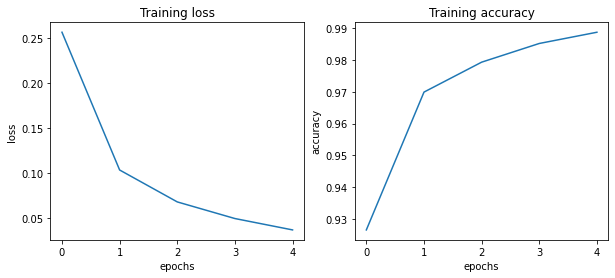

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

#  ----------- YOUR CODE -----------
eps = np.arange(5)
plt.subplot(1,2,1)
#plot of loss
plt.plot(eps, hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training loss')
#plot of accuracy
plt.subplot(1,2,2)
plt.plot(eps, hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy')
plt.show()

## Exercise 2.3
Use the dense network from Section 2 as the basis to construct of a deeper network with

*  5 dense hidden layers with dimensions [512, 256, 128, 64, 32] each of which uses a ReLU non-linearity

**Question:** Will the accuracy on the testing data always get better if we keep making the neural network larger?



*No, the accuracy on testing data will not always get better if we keep making the neural network larger. This is becuase as we increase the model complexity, the model will tend to overfit to the training data and hence result in poor testing accuracy*

In [6]:
import keras
from keras import models
from keras import layers

#  ----------- YOUR CODE -----------
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [7]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5690 - accuracy: 0.8149
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1081 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9846
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9761
test_accuracy: 0.9761000275611877


# Section 3

## Exercise 3.1
In this exercise, you will access the relationship between the feature extraction layer and classification layer. The example above uses two sets of convolutional layers and pooling layers in the feature extraction layer and two dense layers in the classification layers. The overall performance is around 98% for both training and test dataset. In this exercise, try to create a similar CNN network with the following requirements:

*   Achieve the overall accuracy higher than 99% for training and testing dataset.
*  Keep the total number of parameters used in the network lower than 100,000.

In [8]:
import keras
from keras import models
from keras import layers

network = models.Sequential()

# ---- Feature extraction section
# First Layer
network.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
# Second Layer
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

# ---- Classification section
# Rearrange the data
network.add(layers.Flatten())
# Third Layer
network.add(layers.Dense(128, activation='relu'))
# Third Layer
network.add(layers.Dense(64, activation='relu'))
# Fourth Layer
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.5349 - accuracy: 0.8270
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0647 - accuracy: 0.9801
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9885
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.9906
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9923
test_accuracy: 0.9922999739646912


# Section 4

## Exercise 4.1
In this exercise you will need to create the entire neural network that does image denoising tasks. Try to mimic the code provided above and follow the structure as provided in the instructions below.

**Task 1**: Create the datasets
1.   Import necessary packages
2.   Load the MNIST data from Keras, and save the training dataset images as `train_images`, save the test dataset images as `test_images`
3.   Add additive white gaussian noise to the train images as well as the test images and save the noisy images to `train_images_noisy` and `test_images_noisy` respectivly. The noise should have mean value 0, and standard deviation 0.4. (Hint: Use [np.random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html))
4.   Show the first image in the training dataset as well as the test dataset (plot the images in 1 x 2 subplot form)

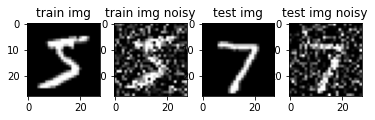

In [10]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#add noise
train_images_noisy = np.clip(train_images + 255*np.random.normal(0,0.4, train_images.shape),0.,255.)
test_images_noisy  = np.clip(test_images + 255*np.random.normal(0,0.4, test_images.shape),0.,255.)

train_images_noisy = train_images_noisy.reshape((60000, 28, 28, 1))
train_images_noisy_nor = train_images_noisy.astype('float32') / 255
test_images_noisy = test_images_noisy.reshape((10000, 28, 28, 1))
test_images_noisy_nor = test_images_noisy.astype('float32') / 255

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

#plot images
#training image
plt.subplot(1,4,1)
plt.imshow(train_images[0,:,:,0],cmap='gray')
plt.title('train img')
plt.subplot(1,4,2)
plt.imshow(train_images_noisy[0,:,:,0],cmap='gray')
plt.title('train img noisy')
#testing image
plt.subplot(1,4,3)
plt.imshow(test_images[0,:,:,0],cmap='gray')
plt.title('test img')
plt.subplot(1,4,4)
plt.imshow(test_images_noisy[0,:,:,0],cmap='gray')
plt.title('test img noisy')
plt.show()

**Task 2**: Create the neural network model
1.   Create a sequential model called `encoder` with the following layers sequentially:
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function and name the layer as `'convOutput'`.
  * flatten layer
  * dense layer with output dimension as `encoding_dim`  with `'relu'` activition function.
2.   Create a sequential model called `decoder` with the following layers sequentially:
  * dense layer with the input dimension as `encoding_dim` and the output dimension as the product of the output dimenstions of the `'convOutput'` layer.
  * reshape layer that convert the tensor into the same shape as `'convOutput'`
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function
  * convolutional layer with `1` output channels, `3x3` kernel size, and the padding convention `'same'` with `'sigmoid'` activition function
3. Create a sequential model called `autoencoder` with the following layers sequentially:
  * `encoder` model
  * `decoder` model
 

In [11]:
#  ----------- YOUR CODE -----------
encoding_dim = 32

# Build Encoder
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', input_shape= train_images_noisy_nor.shape[1:]))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(8, (3, 3),padding='same', activation='relu',name='convOutput'))
encoder.add(layers.Flatten())
encoder.add(layers.Dense(encoding_dim, activation='relu'))

# shape considerations
convShape = encoder.get_layer('convOutput').output_shape[1:]
denseShape = convShape[0]*convShape[1]*convShape[2]

# Build Decoder
decoder = models.Sequential()
decoder.add(layers.Dense(denseShape, input_shape=(encoding_dim,)))
decoder.add(layers.Reshape(convShape))
decoder.add(layers.Conv2D(8, (3, 3),  activation='relu',    padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(16, (3, 3),  activation='relu',    padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(32, (3, 3), activation='relu',    padding='same'))
decoder.add(layers.Conv2D(1, (3, 3),  activation='sigmoid', padding='same'))

# Build Autoencoder
autoencoder = models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

In [12]:
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
convOutput (Conv2D)          (None, 7, 7, 8)           1160      
_________________________________________________________________
flatten_3 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)               

**Task 3**: Create the neural network model  

Fit the model to the training data using the following hyper-parameters:
  * `adam` optimizer
  * `binary_crossentropy` loss function
  * `20` training epochs
  * batch size as `256`
  * set `shuffle` as `True`
  
Compile the model and fit ...

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_images_noisy_nor, train_images_nor, 
                epochs=20, 
                batch_size=256,
                shuffle=True)

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.3471
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1811
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1367
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1264
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1214
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1164
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1135
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1112
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1093
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1076
Epoch 11/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1063
Epoch 12/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1055
Epoch 13/20
235/235 [====

**Task 4**: Create the neural network model (No need to write code, just run the following commands)

In [14]:
def showImages(input_imgs, encoded_imgs, output_imgs, size=1.5, groundTruth=None):

  numCols = 3 if groundTruth is None else 4
  
  num_images = input_imgs.shape[0]
      
  encoded_imgs = encoded_imgs.reshape((num_images, 1, -1))
    

  plt.figure(figsize=((numCols+encoded_imgs.shape[2]/input_imgs.shape[2])*size, num_images*size))

  pltIdx = 0
  col = 0
  for i in range(0, num_images):

    col += 1
    # plot input image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(input_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Input Image')

    # plot encoding
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(encoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Encoded Image')

    # plot reconstructed image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(output_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Reconstructed Image')
  
    if numCols == 4:
      # plot ground truth image
      pltIdx += 1
      ax = plt.subplot(num_images, numCols, pltIdx)
      plt.imshow(groundTruth[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      
      if col == 1:
        plt.title('Ground Truth')

  plt.show()

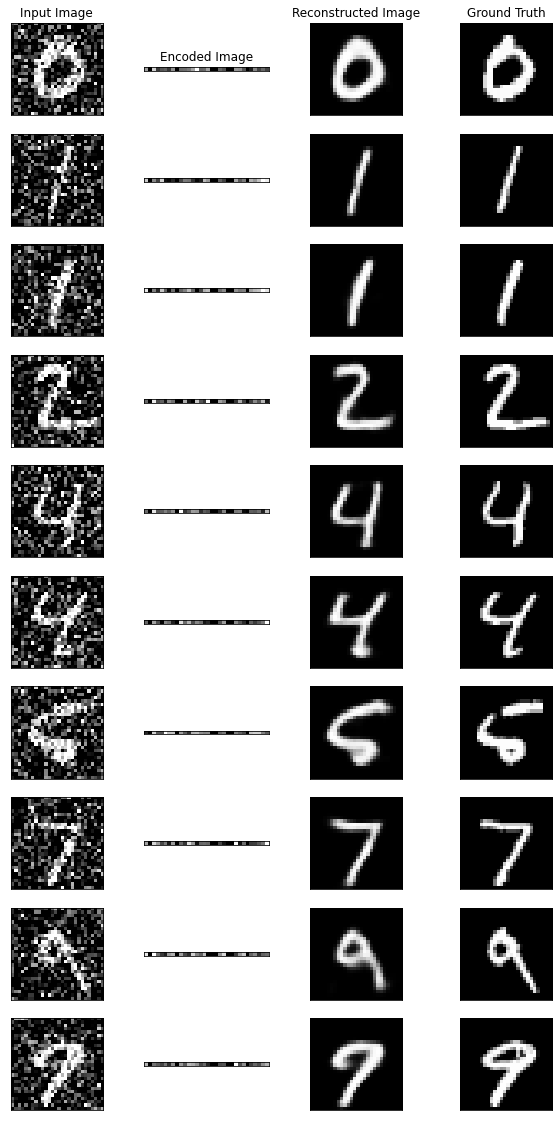

In [15]:
num_images = 10

input_labels = test_labels[0:num_images]
I = np.argsort(input_labels)

input_imgs = test_images_noisy[I]

encoded_imgs = encoder.predict(test_images_noisy[I]/255.)
output_imgs = decoder.predict(encoded_imgs)

showImages(input_imgs, encoded_imgs, output_imgs, size=2, groundTruth=test_images_nor[I])